In [1]:
%matplotlib notebook

In [2]:
# Dependencies
import pandas as pd
import calendar
import matplotlib.pyplot as plt

import numpy as np
from sklearn import datasets

import scipy.stats as st
from scipy.stats import linregress

In [3]:
# Name of the CSV file
file = '../Mano/updated_Final_Covid_Data.csv'

In [4]:
df = pd.read_csv(file)
df

,Unnamed: 0,State,Year-Month,Population,Total_Cases,Total_Deaths,Total_Positives,Total_Negatives,Vaccine_Dist,Vaccine_Admin,Vaccine_Int,Vaccine_Complete,Add_Dose,Monthly Cases,Monthly Deaths,Monthly Positive,Monthly Negatives,Monthly Vaccine Initiated,Monthly Vaccine Completed,Monthly Additional Dose
0,1,AK,2021-1,732673.0,53985.0,253.0,93699.0,1547506.0,193150.0,119590.0,0.0,0.0,0.0,7245.0,55.0,9532.0,226096.0,0.0,0.0,0.0
1,2,AK,2021-2,732673.0,57846.0,279.0,98919.0,1742031.0,342535.0,264741.0,166735.0,0.0,0.0,3861.0,26.0,5220.0,194525.0,166735.0,0.0,0.0
2,3,AK,2021-3,732673.0,62559.0,299.0,104247.0,1954197.0,601225.0,407233.0,248711.0,163100.0,0.0,4713.0,20.0,5328.0,212166.0,81976.0,163100.0,0.0
3,4,AK,2021-4,732673.0,67598.0,330.0,109932.0,2152524.0,769205.0,552792.0,305395.0,256564.0,0.0,5039.0,31.0,5685.0,198327.0,56684.0,93464.0,0.0
4,5,AK,2021-5,732673.0,69627.0,352.0,112288.0,2299052.0,806335.0,612275.0,337795.0,287850.0,0.0,2029.0,22.0,2356.0,146528.0,32400.0,31286.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,684,WY,2021-8,578803.0,75136.0,858.0,62119.0,865487.0,586155.0,478281.0,262132.0,223590.0,0.0,10009.0,82.0,6378.0,59414.0,20522.0,11360.0,0.0
632,685,WY,2021-9,578803.0,90602.0,996.0,72700.0,949582.0,658215.0,520777.0,280635.0,240814.0,0.0,15466.0,138.0,10581.0,84095.0,18503.0,17224.0,0.0
633,686,WY,2021-10,578803.0,102926.0,1174.0,80967.0,1018072.0,742965.0,569168.0,294284.0,254028.0,30404.0,12324.0,178.0,8267.0,68490.0,13649.0,13214.0,30404.0
634,687,WY,2021-11,578803.0,111089.0,1428.0,85935.0,1076921.0,813665.0,632809.0,310481.0,263763.0,69165.0,8163.0,254.0,4968.0,58849.0,16197.0,9735.0,38761.0


In [5]:
df=df.drop(columns='Unnamed: 0')
df

,State,Year-Month,Population,Total_Cases,Total_Deaths,Total_Positives,Total_Negatives,Vaccine_Dist,Vaccine_Admin,Vaccine_Int,Vaccine_Complete,Add_Dose,Monthly Cases,Monthly Deaths,Monthly Positive,Monthly Negatives,Monthly Vaccine Initiated,Monthly Vaccine Completed,Monthly Additional Dose
0,AK,2021-1,732673.0,53985.0,253.0,93699.0,1547506.0,193150.0,119590.0,0.0,0.0,0.0,7245.0,55.0,9532.0,226096.0,0.0,0.0,0.0
1,AK,2021-2,732673.0,57846.0,279.0,98919.0,1742031.0,342535.0,264741.0,166735.0,0.0,0.0,3861.0,26.0,5220.0,194525.0,166735.0,0.0,0.0
2,AK,2021-3,732673.0,62559.0,299.0,104247.0,1954197.0,601225.0,407233.0,248711.0,163100.0,0.0,4713.0,20.0,5328.0,212166.0,81976.0,163100.0,0.0
3,AK,2021-4,732673.0,67598.0,330.0,109932.0,2152524.0,769205.0,552792.0,305395.0,256564.0,0.0,5039.0,31.0,5685.0,198327.0,56684.0,93464.0,0.0
4,AK,2021-5,732673.0,69627.0,352.0,112288.0,2299052.0,806335.0,612275.0,337795.0,287850.0,0.0,2029.0,22.0,2356.0,146528.0,32400.0,31286.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,WY,2021-8,578803.0,75136.0,858.0,62119.0,865487.0,586155.0,478281.0,262132.0,223590.0,0.0,10009.0,82.0,6378.0,59414.0,20522.0,11360.0,0.0
632,WY,2021-9,578803.0,90602.0,996.0,72700.0,949582.0,658215.0,520777.0,280635.0,240814.0,0.0,15466.0,138.0,10581.0,84095.0,18503.0,17224.0,0.0
633,WY,2021-10,578803.0,102926.0,1174.0,80967.0,1018072.0,742965.0,569168.0,294284.0,254028.0,30404.0,12324.0,178.0,8267.0,68490.0,13649.0,13214.0,30404.0
634,WY,2021-11,578803.0,111089.0,1428.0,85935.0,1076921.0,813665.0,632809.0,310481.0,263763.0,69165.0,8163.0,254.0,4968.0,58849.0,16197.0,9735.0,38761.0


In [6]:
df.columns = df.columns.str.replace(' ', '_')
df

,State,Year-Month,Population,Total_Cases,Total_Deaths,Total_Positives,Total_Negatives,Vaccine_Dist,Vaccine_Admin,Vaccine_Int,Vaccine_Complete,Add_Dose,Monthly_Cases,Monthly_Deaths,Monthly_Positive,Monthly_Negatives,Monthly_Vaccine_Initiated,Monthly_Vaccine_Completed,Monthly_Additional_Dose
0,AK,2021-1,732673.0,53985.0,253.0,93699.0,1547506.0,193150.0,119590.0,0.0,0.0,0.0,7245.0,55.0,9532.0,226096.0,0.0,0.0,0.0
1,AK,2021-2,732673.0,57846.0,279.0,98919.0,1742031.0,342535.0,264741.0,166735.0,0.0,0.0,3861.0,26.0,5220.0,194525.0,166735.0,0.0,0.0
2,AK,2021-3,732673.0,62559.0,299.0,104247.0,1954197.0,601225.0,407233.0,248711.0,163100.0,0.0,4713.0,20.0,5328.0,212166.0,81976.0,163100.0,0.0
3,AK,2021-4,732673.0,67598.0,330.0,109932.0,2152524.0,769205.0,552792.0,305395.0,256564.0,0.0,5039.0,31.0,5685.0,198327.0,56684.0,93464.0,0.0
4,AK,2021-5,732673.0,69627.0,352.0,112288.0,2299052.0,806335.0,612275.0,337795.0,287850.0,0.0,2029.0,22.0,2356.0,146528.0,32400.0,31286.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,WY,2021-8,578803.0,75136.0,858.0,62119.0,865487.0,586155.0,478281.0,262132.0,223590.0,0.0,10009.0,82.0,6378.0,59414.0,20522.0,11360.0,0.0
632,WY,2021-9,578803.0,90602.0,996.0,72700.0,949582.0,658215.0,520777.0,280635.0,240814.0,0.0,15466.0,138.0,10581.0,84095.0,18503.0,17224.0,0.0
633,WY,2021-10,578803.0,102926.0,1174.0,80967.0,1018072.0,742965.0,569168.0,294284.0,254028.0,30404.0,12324.0,178.0,8267.0,68490.0,13649.0,13214.0,30404.0
634,WY,2021-11,578803.0,111089.0,1428.0,85935.0,1076921.0,813665.0,632809.0,310481.0,263763.0,69165.0,8163.0,254.0,4968.0,58849.0,16197.0,9735.0,38761.0


In [7]:
df.describe()

,Population,Total_Cases,Total_Deaths,Total_Positives,Total_Negatives,Vaccine_Dist,Vaccine_Admin,Vaccine_Int,Vaccine_Complete,Add_Dose,Monthly_Cases,Monthly_Deaths,Monthly_Positive,Monthly_Negatives,Monthly_Vaccine_Initiated,Monthly_Vaccine_Completed,Monthly_Additional_Dose
count,6.360000e+02,6.360000e+02,636.000000,6.360000e+02,6.360000e+02,6.360000e+02,6.360000e+02,6.360000e+02,6.360000e+02,6.360000e+02,6.360000e+02,636.000000,636.000000,6.360000e+02,6.360000e+02,6.360000e+02,6.360000e+02
mean,6.323723e+06,7.044005e+05,11919.055031,7.468016e+05,8.572192e+06,6.603195e+06,5.396105e+06,2.894795e+06,2.330834e+06,1.971333e+05,5.419369e+04,751.685535,53668.586478,6.652616e+05,3.602180e+05,3.067473e+05,1.063458e+05
std,7.257991e+06,8.544936e+05,14608.582476,9.178703e+05,1.213120e+07,9.727648e+06,8.114198e+06,4.348374e+06,3.605215e+06,6.570260e+05,9.122607e+04,1342.497213,97352.132499,1.091006e+06,6.898165e+05,6.340288e+05,3.274964e+05
min,0.000000e+00,0.000000e+00,2.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,-1149.000000,-5.793100e+04,-4.366890e+05,-2.772740e+05,0.000000e+00
25%,1.782959e+06,1.544462e+05,2285.000000,1.530912e+05,2.036566e+06,9.820262e+05,7.591550e+05,3.910162e+05,2.557375e+04,0.000000e+00,8.146250e+03,105.750000,6919.750000,1.351372e+05,2.459425e+04,5.520000e+02,0.000000e+00
50%,4.246155e+06,4.582160e+05,7252.000000,4.966605e+05,4.168090e+06,3.499315e+06,2.784916e+06,1.578844e+06,1.150658e+06,0.000000e+00,2.424900e+04,303.000000,21142.000000,2.861110e+05,1.339345e+05,9.747250e+04,0.000000e+00
75%,7.276316e+06,8.742608e+05,14847.250000,9.358608e+05,1.004560e+07,8.001964e+06,6.533408e+06,3.536820e+06,3.019672e+06,0.000000e+00,6.080100e+04,874.750000,59143.250000,7.515012e+05,3.696212e+05,2.894988e+05,0.000000e+00
max,3.923784e+07,5.515613e+06,76709.000000,5.794783e+06,1.008338e+08,7.626090e+07,6.600719e+07,3.277198e+07,2.617077e+07,8.754917e+06,1.016204e+06,14963.000000,944670.000000,9.194526e+06,7.058297e+06,6.348325e+06,3.630027e+06


In [8]:
#creating bar chart for states vs monthly cases
df1=df.groupby("State")
df1
#y_axis=df['Monthly Cases']
#df.plot(kind='bar', x=x_axis, y=y_axis, x_label='States', y_label='Monthly total cases')
#plot.show()

In [9]:
case_count=df1["Monthly_Cases"].sum()
case_count

State
AK     109390.0
AL     535388.0
AR     341348.0
AZ     857659.0
CA    3207753.0
CO     597678.0
CT     324480.0
DC      65303.0
DE     122910.0
FL    2843085.0
GA    1154432.0
HI      88117.0
IA     293789.0
ID          0.0
IL    1188218.0
IN     736110.0
KS     295045.0
KY     595771.0
LA     513420.0
MA     765436.0
MD     423955.0
ME     122535.0
MI    1179687.0
MN     606991.0
MO     604673.0
MP       3133.0
MS     327926.0
MT     116083.0
NC    1144434.0
ND      81718.0
NE     170462.0
NH     154639.0
NJ    1084872.0
NM     207146.0
NV     276016.0
NY    2494930.0
OH    1315715.0
OK     418002.0
OR     307334.0
PA    1390364.0
PR     195999.0
RI     143147.0
SC     667813.0
SD      80040.0
TN     807338.0
TX    2804354.0
UT     360532.0
VA     768934.0
VT      57035.0
WA     601760.0
WI     600231.0
WV     242828.0
WY      71229.0
Name: Monthly_Cases, dtype: float64

<IPython.core.display.Javascript object>


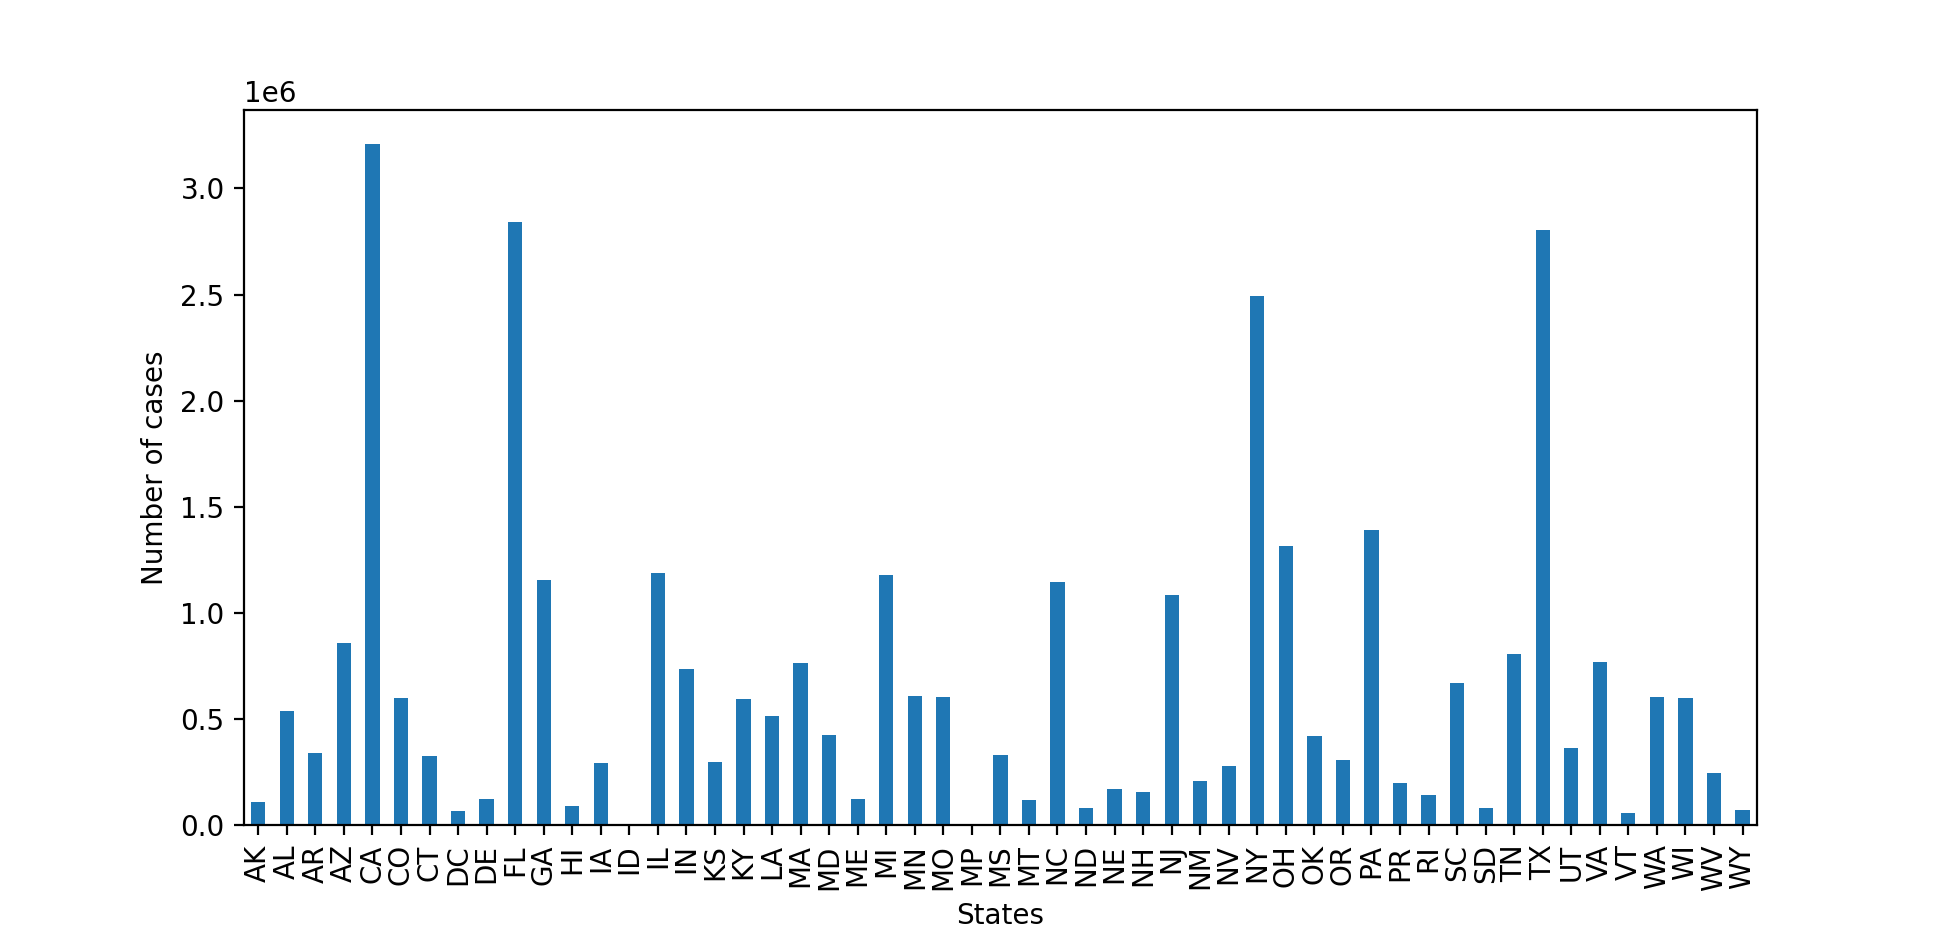

In [10]:
state_cases=case_count.plot(kind='bar')
state_cases.set_xlabel("States")
state_cases.set_ylabel("Number of cases")


plt.show()


In [ ]:
#data = df[['State','Monthly_Cases']].nlargest(25,'Monthly_Cases')
#fig = plt.bar(data, x = 'State',y = 'Monthly_Cases',title="Number of total cases in States",)
#fig.show()



In [22]:
month_state=df.groupby(['State']).agg({"Monthly_Cases": "sum"})
month_state

,Monthly_Cases
State,
AK,109390.0
AL,535388.0
AR,341348.0
AZ,857659.0
CA,3207753.0
CO,597678.0
CT,324480.0
DC,65303.0
DE,122910.0


In [34]:
high_cases = month_state[month_state.Monthly_Cases >= 1000000]
high_cases
state_high=high_cases.reset_index()
state_high

,State,Monthly_Cases
0,CA,3207753.0
1,FL,2843085.0
2,GA,1154432.0
3,IL,1188218.0
4,MI,1179687.0
5,NC,1144434.0
6,NJ,1084872.0
7,NY,2494930.0
8,OH,1315715.0
9,PA,1390364.0


<IPython.core.display.Javascript object>


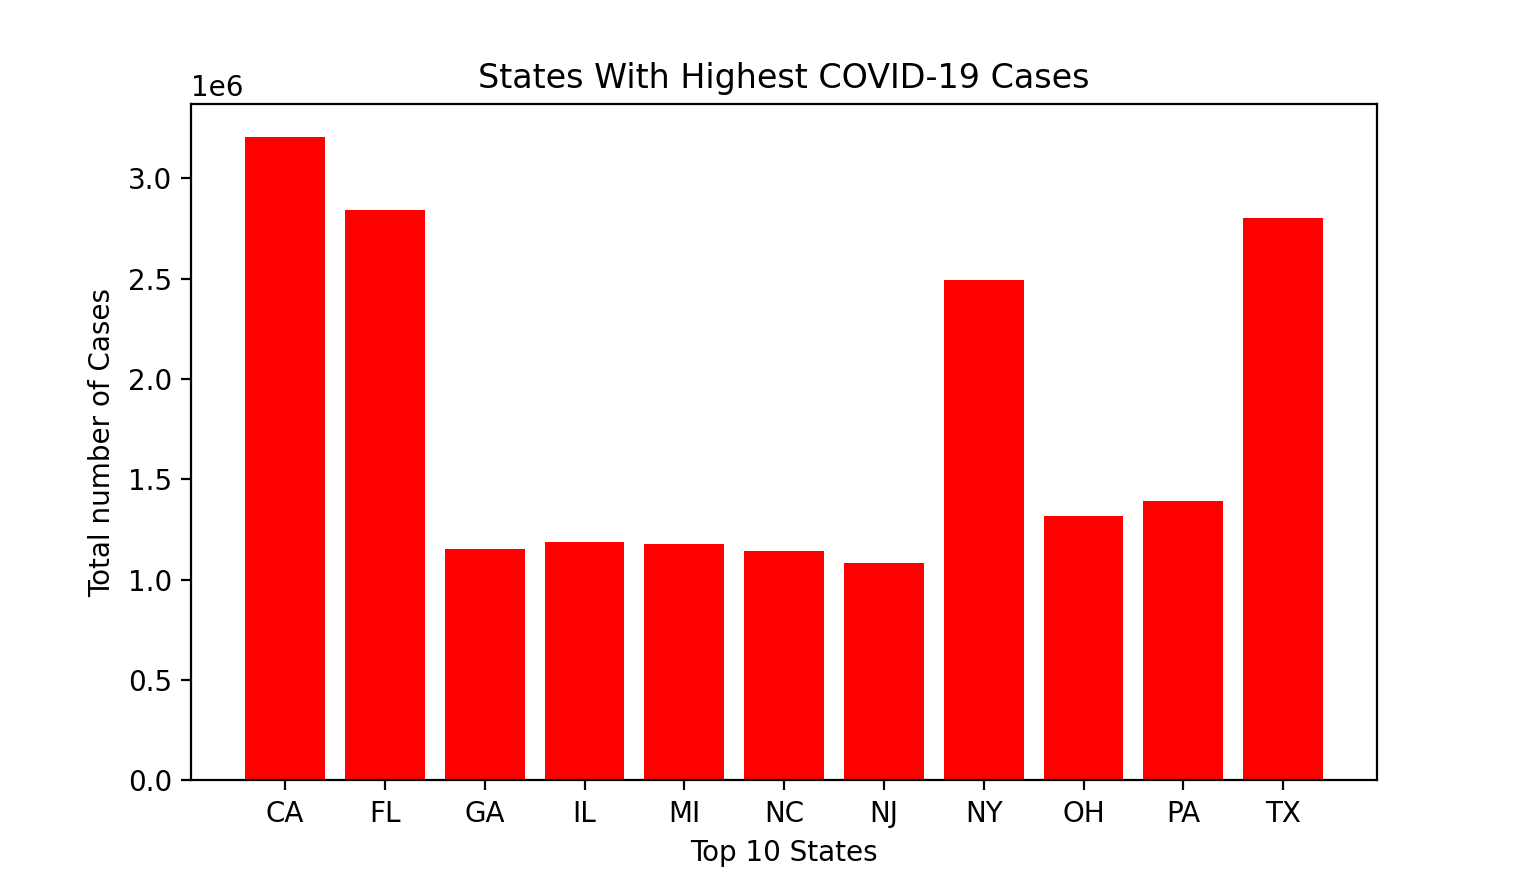

Text(0, 0.5, 'Total number of Cases')

In [35]:
plt.figure(figsize=(8, 9))
plt.bar(state_high['State'], state_high['Monthly_Cases'], color='red')
plt.title('States With Highest COVID-19 Cases in 2021')
plt.xlabel('Top 10 States')
plt.ylabel('Total number of Cases')

In [36]:
high_cases = month_state[month_state.Monthly_Cases >= 1000000]
high_cases
state_high=high_cases.reset_index()
state_high
death_count=df1["Monthly_Cases"].sum()
death_count

State
AK     109390.0
AL     535388.0
AR     341348.0
AZ     857659.0
CA    3207753.0
CO     597678.0
CT     324480.0
DC      65303.0
DE     122910.0
FL    2843085.0
GA    1154432.0
HI      88117.0
IA     293789.0
ID          0.0
IL    1188218.0
IN     736110.0
KS     295045.0
KY     595771.0
LA     513420.0
MA     765436.0
MD     423955.0
ME     122535.0
MI    1179687.0
MN     606991.0
MO     604673.0
MP       3133.0
MS     327926.0
MT     116083.0
NC    1144434.0
ND      81718.0
NE     170462.0
NH     154639.0
NJ    1084872.0
NM     207146.0
NV     276016.0
NY    2494930.0
OH    1315715.0
OK     418002.0
OR     307334.0
PA    1390364.0
PR     195999.0
RI     143147.0
SC     667813.0
SD      80040.0
TN     807338.0
TX    2804354.0
UT     360532.0
VA     768934.0
VT      57035.0
WA     601760.0
WI     600231.0
WV     242828.0
WY      71229.0
Name: Monthly_Cases, dtype: float64

<IPython.core.display.Javascript object>


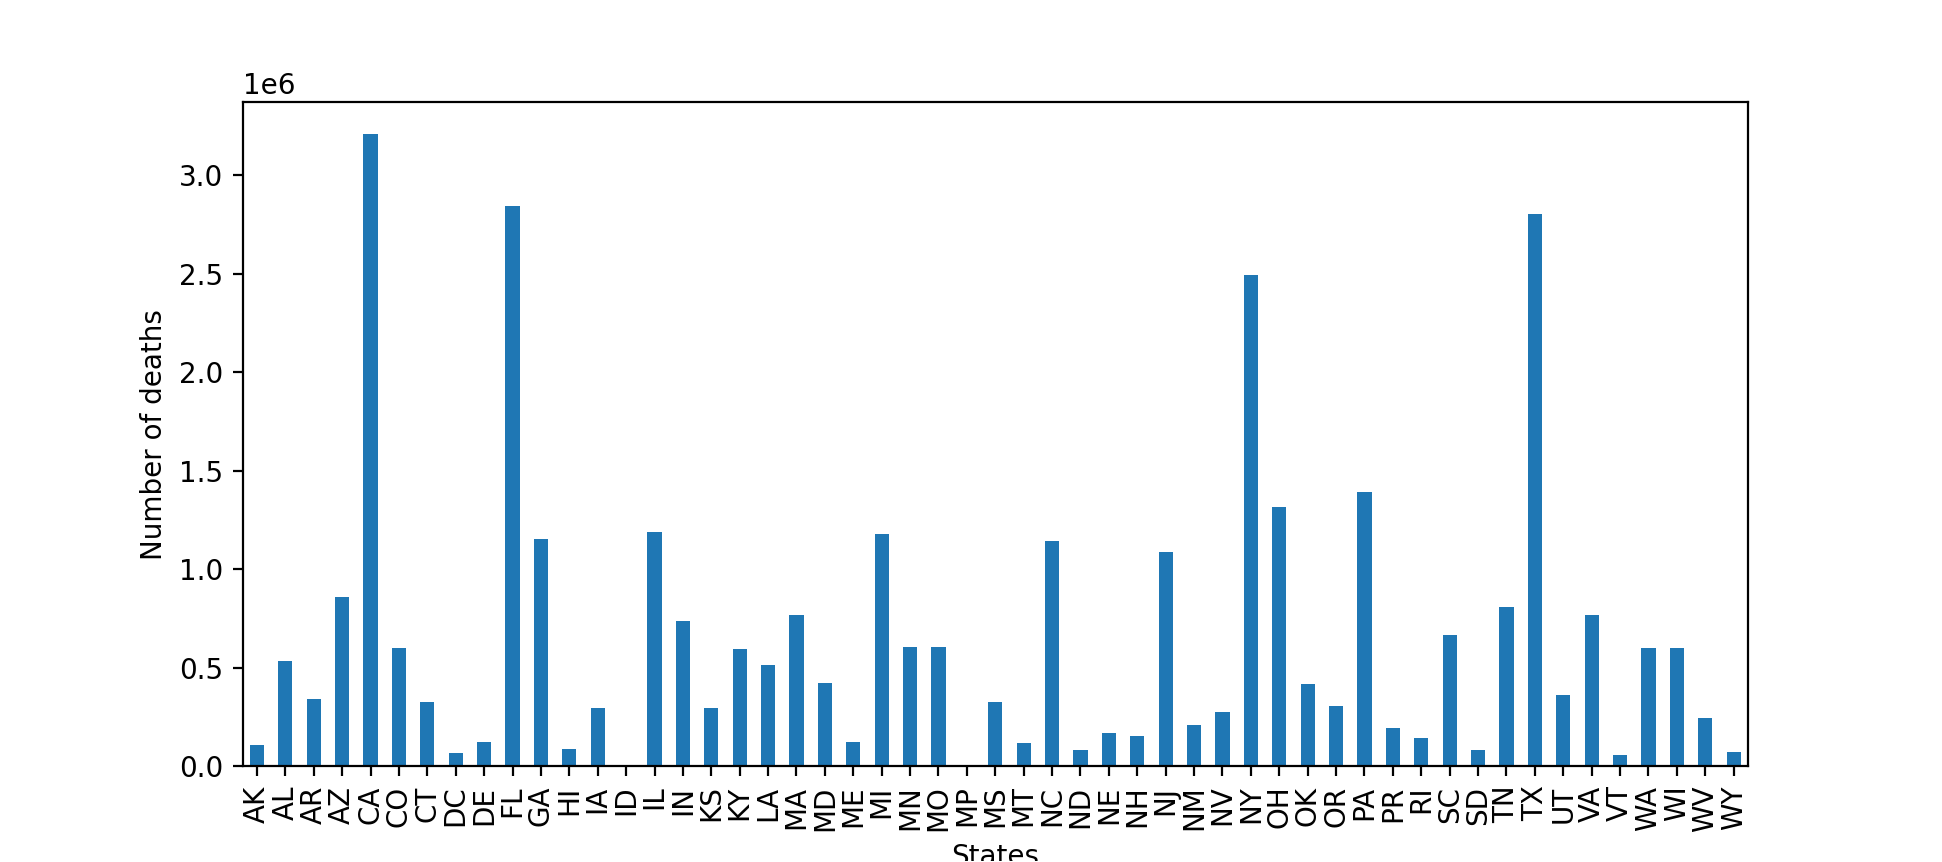

In [37]:
state_deaths=death_count.plot(kind='bar')
#state_deaths.CData(5) = [0 0.8 0.8]
state_deaths.set_xlabel("States")
state_deaths.set_ylabel("Number of deaths")

plt.show()


In [68]:
state_deaths=df.groupby(['State']).agg({"Monthly_Deaths": "sum"})
state_deaths.head()

,Monthly_Deaths
State,
AK,756.0
AL,11628.0
AR,5472.0
AZ,15350.0
CA,50744.0


In [50]:
high_deaths = state_deaths[state_deaths.Monthly_Deaths >= 10000]
high_deaths

state_deaths=high_deaths.reset_index()
state_deaths

,State,Monthly_Deaths
0,AL,11628.0
1,AZ,15350.0
2,CA,50744.0
3,FL,40832.0
4,GA,19695.0
5,IL,13038.0
6,IN,10774.0
7,MI,15974.0
8,MO,10336.0
9,NC,12625.0


<IPython.core.display.Javascript object>


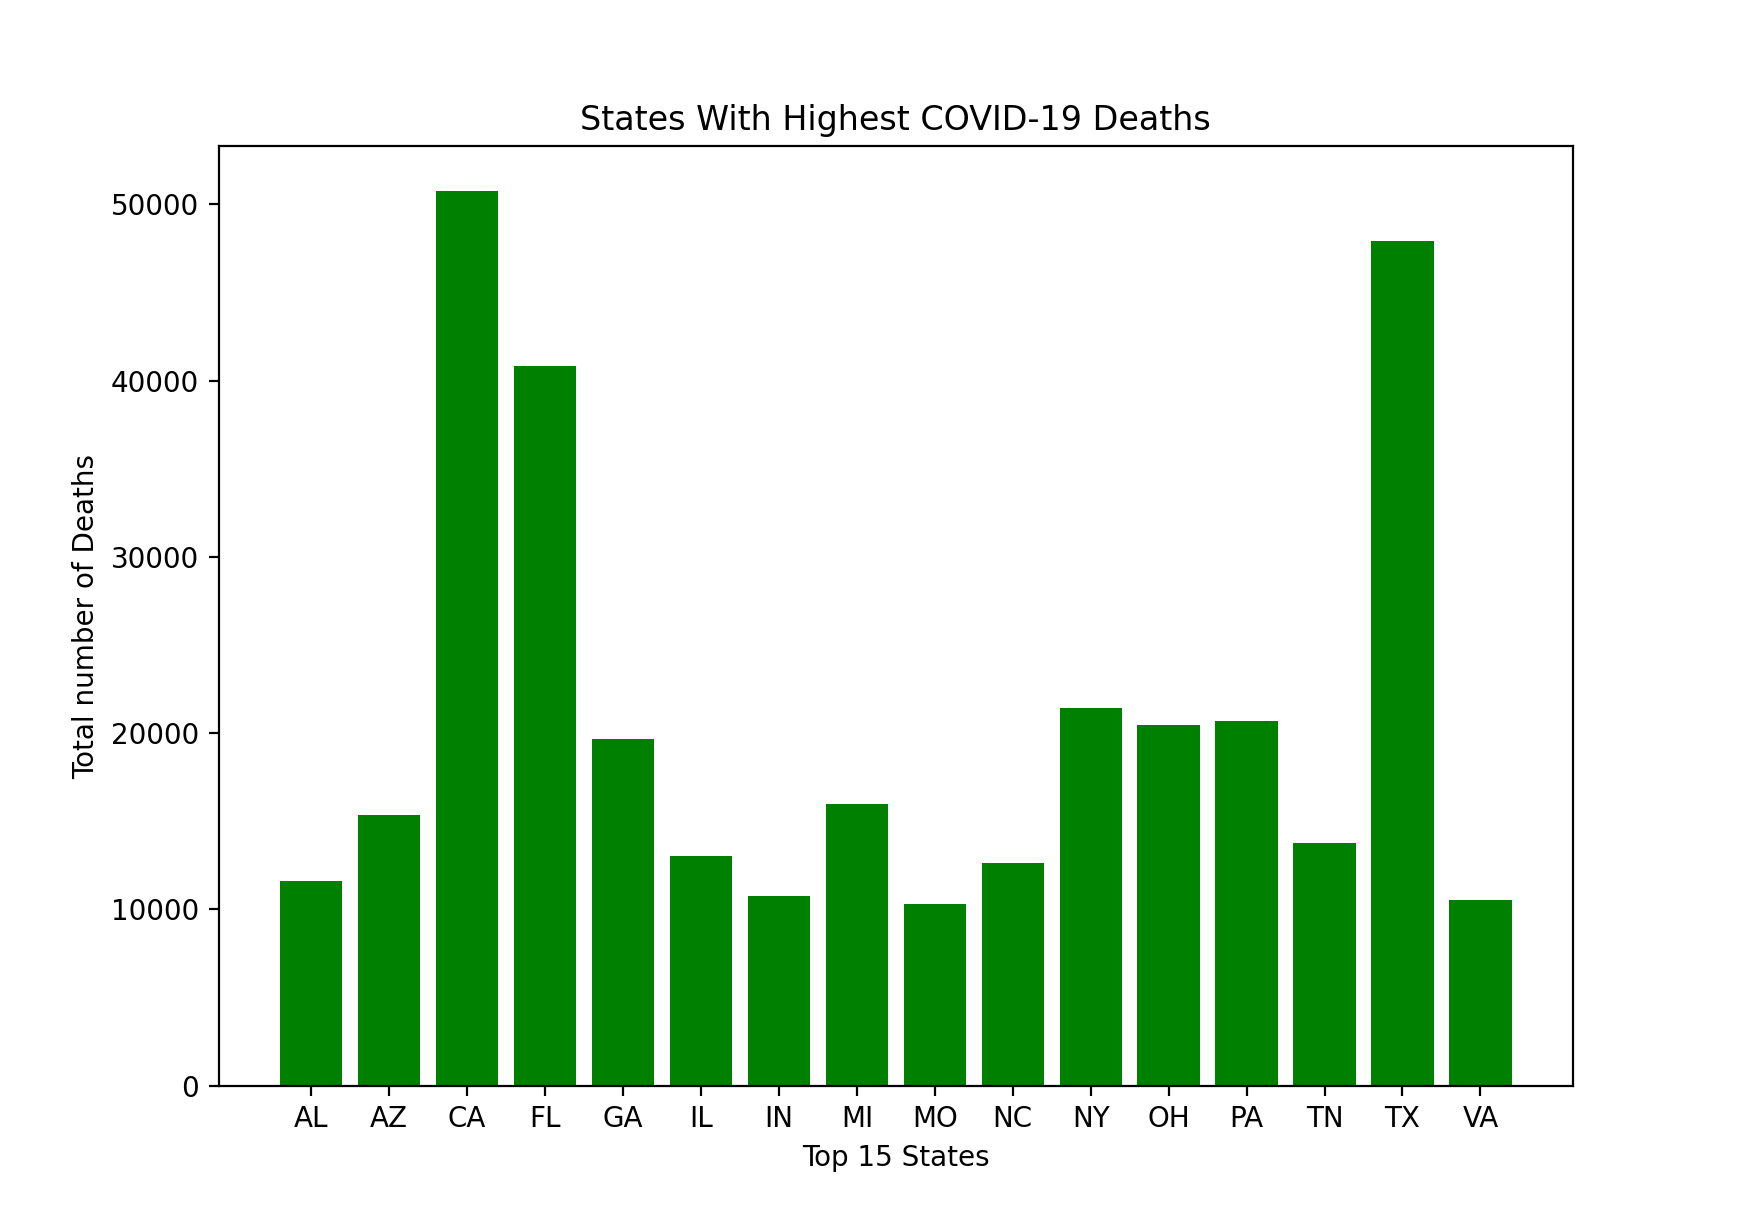

Text(0, 0.5, 'Total number of Deaths')

In [52]:
plt.figure(figsize=(5, 6))
plt.bar(state_deaths['State'], state_deaths['Monthly_Deaths'], color='g')
plt.title('States With Highest COVID-19 Deaths')
plt.xlabel('Top 15 States')
plt.ylabel('Total number of Deaths')

In [53]:
positive_count=df1["Monthly_Positive"].sum()
positive_count

State
AK      70659.0
AL     441612.0
AR     174412.0
AZ     840417.0
CA    3410337.0
CO     634159.0
CT     372703.0
DC     111386.0
DE     139237.0
FL    3290496.0
GA     924913.0
HI      83129.0
IA     277864.0
ID     235653.0
IL    1120814.0
IN     674622.0
KS     244616.0
KY     499821.0
LA     344895.0
MA     782980.0
MD     893783.0
ME     112209.0
MI    1247933.0
MN     865243.0
MO     602873.0
MP       -294.0
MS     164737.0
MT      99037.0
NC    1089320.0
ND      48008.0
NE     118021.0
NH     132226.0
NJ    1165729.0
NM     449161.0
NV     327838.0
NY    2691406.0
OH    1071831.0
OK     296984.0
OR     254757.0
PA    1278507.0
PR     156284.0
RI     137423.0
SC     629207.0
SD      67980.0
TN     515299.0
TX    2899973.0
UT     362980.0
VA     806575.0
VT      78820.0
WA          0.0
WI     587422.0
WV     257106.0
WY      50118.0
Name: Monthly_Positive, dtype: float64

<IPython.core.display.Javascript object>


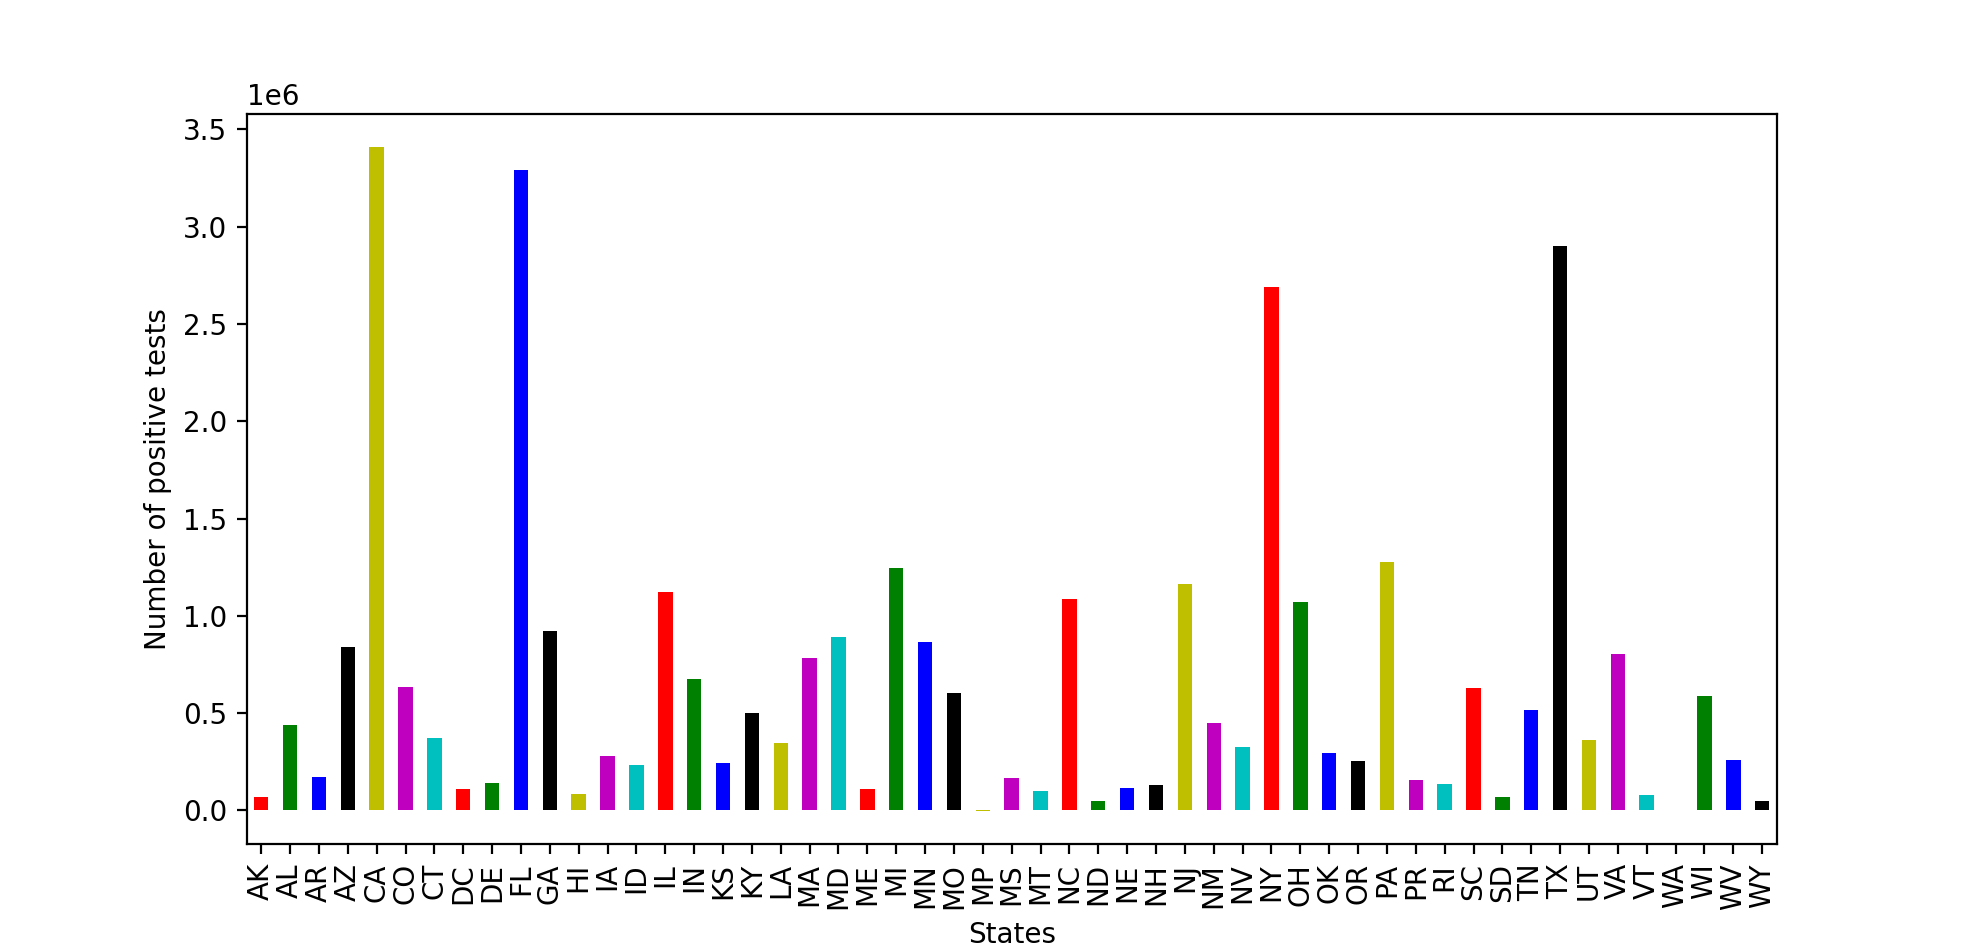

In [54]:
colors = list('rgbkymc')
positive_test=positive_count.plot(kind='bar', color= colors)
positive_test.set_xlabel("States")
positive_test.set_ylabel("Number of positive tests")

plt.show()

In [55]:
negative_count=df1["Monthly_Negatives"].sum()
negative_count

State
AK     1574232.0
AL     2901719.0
AR     1948377.0
AZ     6928702.0
CA    73330051.0
CO     8115602.0
CT     7727505.0
DC     2624691.0
DE     1852210.0
FL    27027117.0
GA     7338086.0
HI     1938267.0
IA     2393411.0
ID     1432432.0
IL    22727181.0
IN     5866598.0
KS     2448112.0
KY     4331779.0
LA     4361267.0
MA    23694975.0
MD    10355728.0
ME     2132034.0
MI    11084749.0
MN    11583574.0
MO     5459026.0
MP      -26796.0
MS     1051587.0
MT      919193.0
NC    11175474.0
ND      778236.0
NE      997026.0
NH     2077606.0
NJ    13490234.0
NM     2411593.0
NV     2450729.0
NY    45964523.0
OH    10160896.0
OK     1517868.0
OR     3853686.0
PA    13050072.0
PR     1722834.0
RI     3946569.0
SC     6603735.0
SD      424551.0
TN     3819980.0
TX    23075299.0
UT     3048842.0
VA     6917604.0
VT     2244332.0
WA           0.0
WI     7227308.0
WV     2381643.0
WY      644328.0
Name: Monthly_Negatives, dtype: float64

<IPython.core.display.Javascript object>


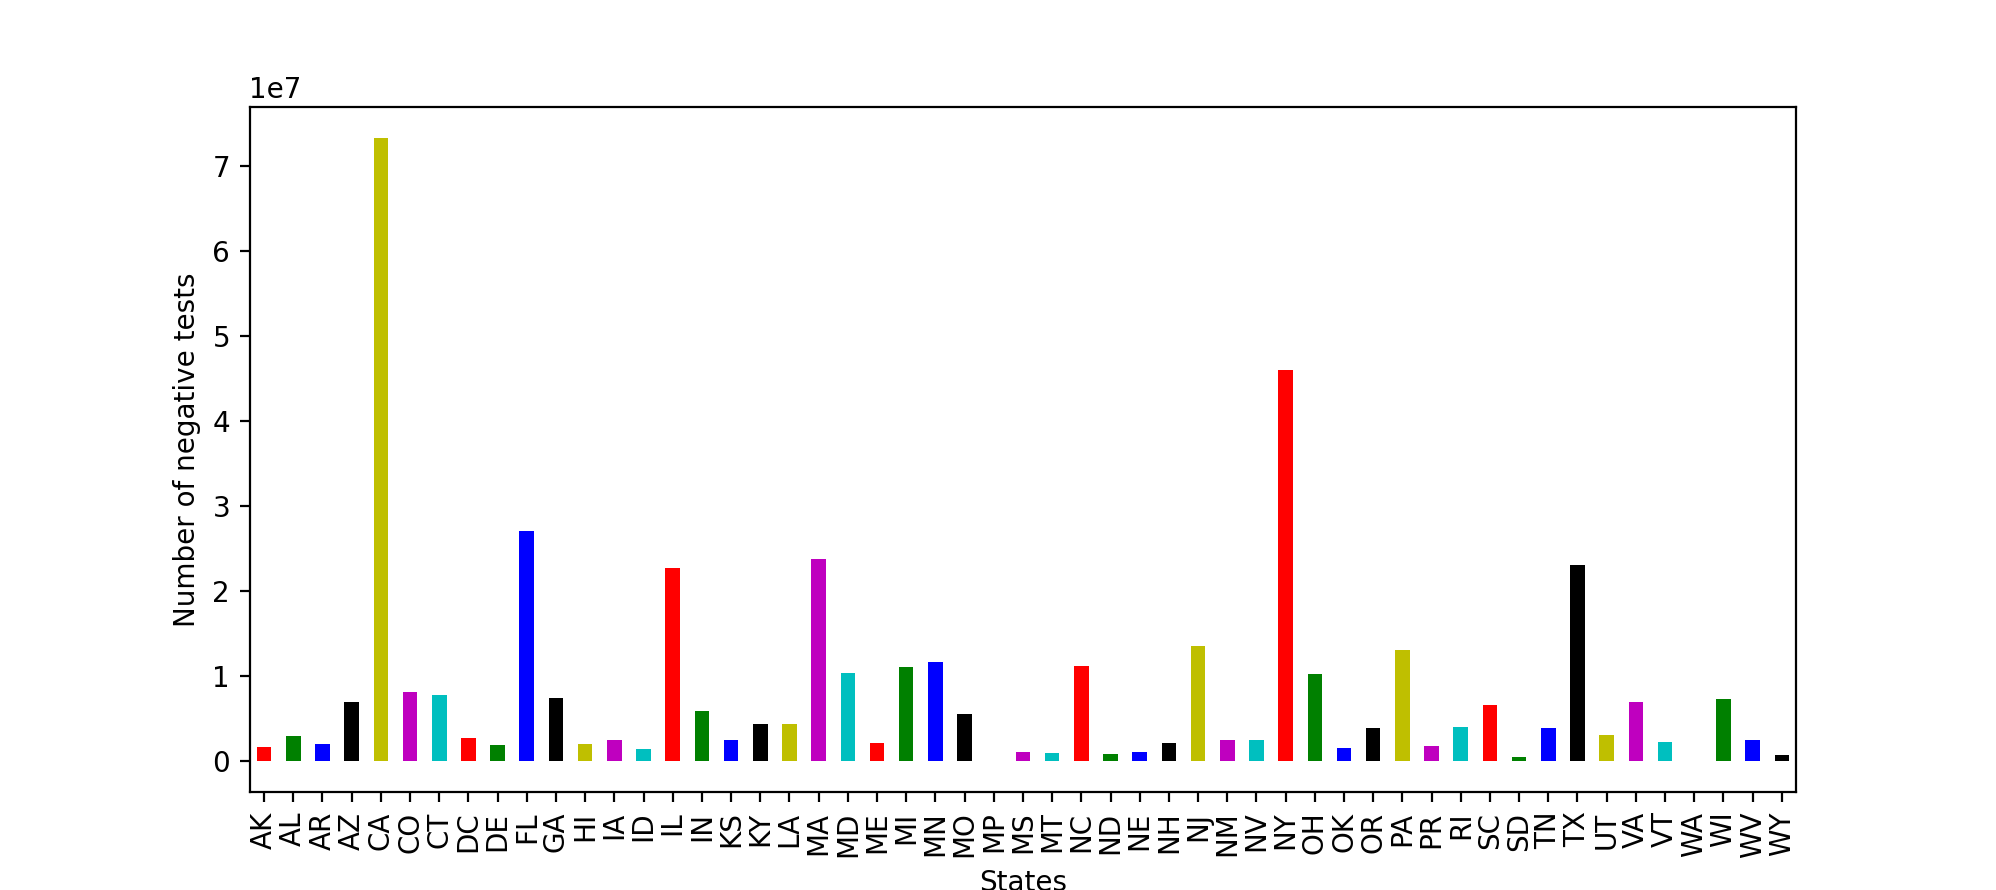

In [56]:
colors = list('rgbkymc')
negative_test=negative_count.plot(kind='bar', color= colors)
negative_test.set_xlabel("States")
negative_test.set_ylabel("Number of negative tests")

plt.show()

In [57]:
correlation1=pd.DataFrame({'Total_cases': case_count,
                          'Positive_test': positive_count,
                          'Negative_test': negative_count})
correlation1

,Total_cases,Positive_test,Negative_test
State,,,
AK,109390.0,70659.0,1574232.0
AL,535388.0,441612.0,2901719.0
AR,341348.0,174412.0,1948377.0
AZ,857659.0,840417.0,6928702.0
CA,3207753.0,3410337.0,73330051.0
CO,597678.0,634159.0,8115602.0
CT,324480.0,372703.0,7727505.0
DC,65303.0,111386.0,2624691.0
DE,122910.0,139237.0,1852210.0


In [58]:
#correlation between total case and positive tests
total_cases = case_count
positive_test = positive_count
correlation = st.pearsonr(total_cases, positive_count)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.98


<IPython.core.display.Javascript object>


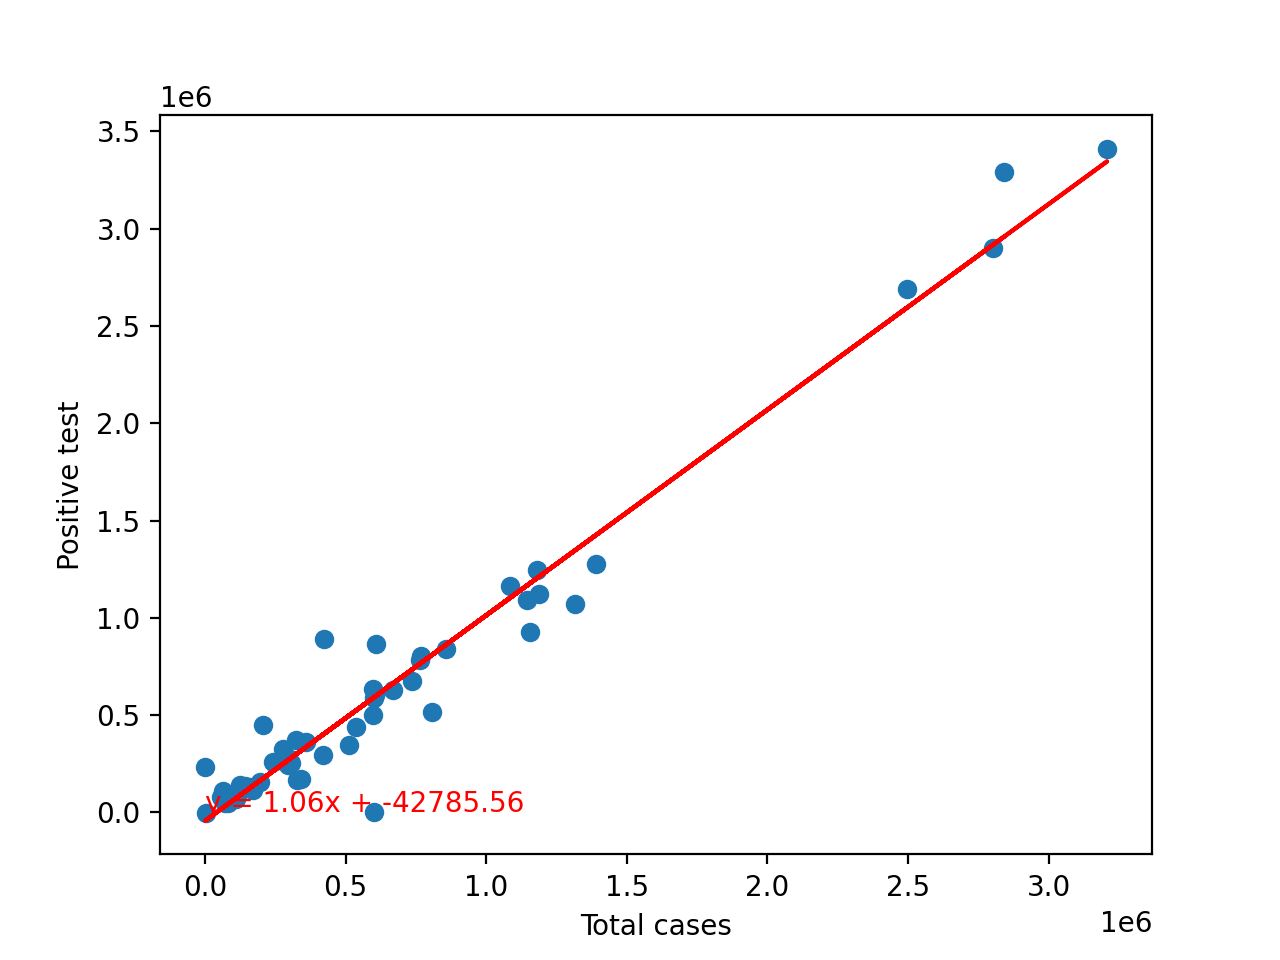

The correlation between both factors is 0.86


In [62]:
#Compare the calcualted Pearson's r to the plots
x_values=total_cases
y_values=positive_count
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(,0.5),fontsize=10,color="red")

plt.xlabel('Total cases')
plt.ylabel('Positive test')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

In [60]:
#correlation between total case and negative tests
total_cases = case_count
negative_test = negative_count
correlation = st.pearsonr(total_cases, negative_count)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.86


<IPython.core.display.Javascript object>


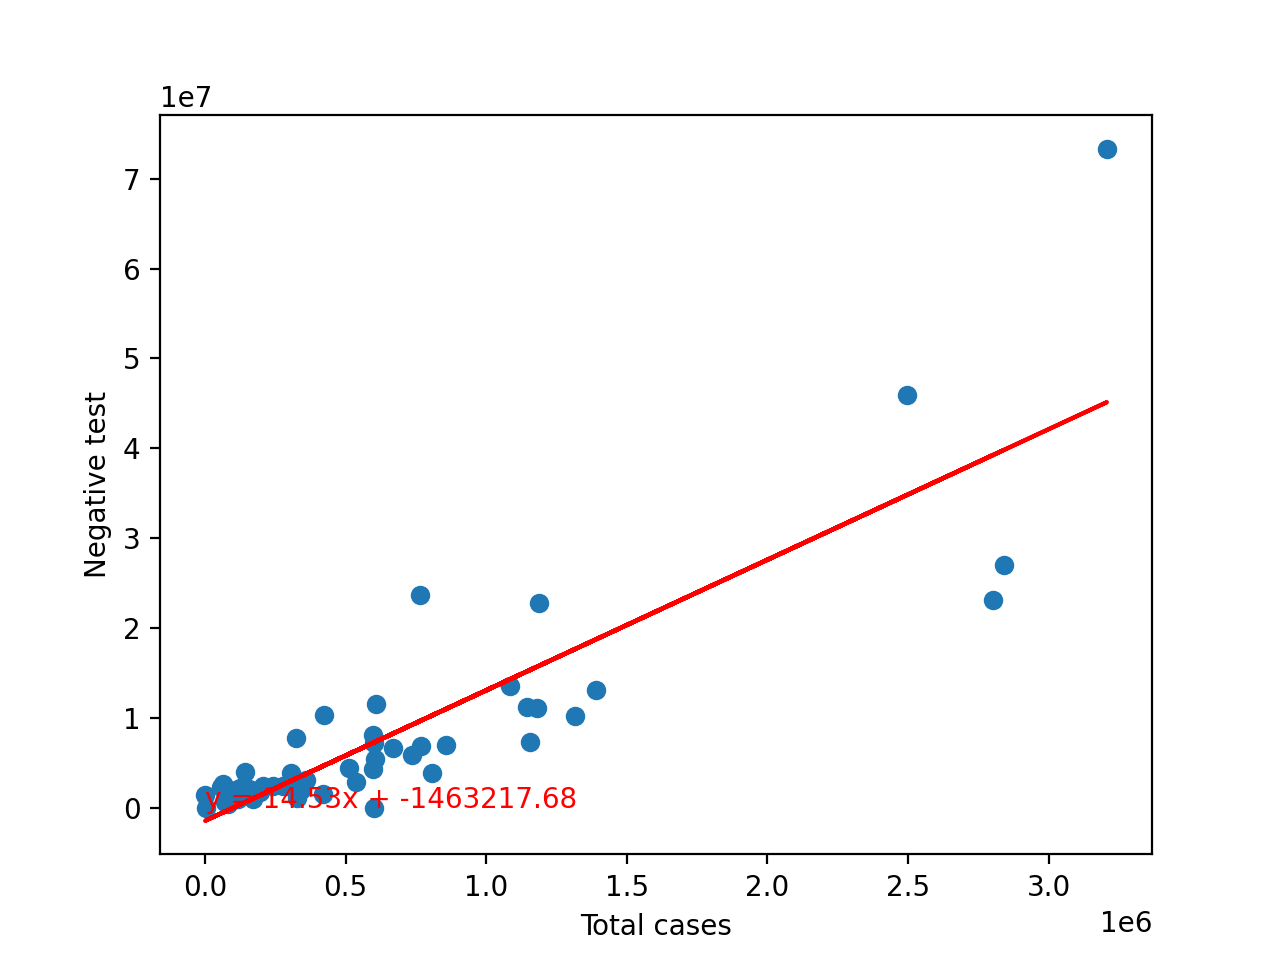

The correlation between both factors is 0.86


In [63]:
#Compare the calcualted Pearson's r to the plots
x_values=total_cases
y_values=negative_count
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(7,0.5),fontsize=10,color="red")

plt.xlabel('Total cases')
plt.ylabel('Negative test')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

In [64]:
#calculating mortality rate
#number of deaths by population
#x number of deaths per 100,000 population

mortality_rate =df['Monthly_Deaths']/df['Population']* 100000
mortality_rate


0       7.506759
1       3.548650
2       2.729731
3       4.231083
4       3.002704
         ...    
631    14.167169
632    23.842309
633    30.753123
634    43.883670
635    16.931495
Length: 636, dtype: float64

In [65]:
#splitting year and month column based on delimiter
month=df['Year-Month'].str.split('-', expand=True)
month.columns=['Year', 'Month']
month_num=month['Month']
month_num

0       1
1       2
2       3
3       4
4       5
       ..
631     8
632     9
633    10
634    11
635    12
Name: Month, Length: 636, dtype: object

In [66]:
month_df=pd.DataFrame({'Month':month_num})
month_df

,Month
0,1
1,2
2,3
3,4
4,5
...,...
631,8
632,9
633,10
634,11


In [67]:
#Getting month names based on the month numbers

#df['Month'] = df['Month'].apply(lambda x: calendar.month_abbr[x])
month_df['Month'] = pd.to_datetime(month_df['Month'], format='%m').dt.month_name().str.slice(stop=3)

month_df

,Month
0,Jan
1,Feb
2,Mar
3,Apr
4,May
...,...
631,Aug
632,Sep
633,Oct
634,Nov


In [69]:
monthly_total=df['Monthly_Cases']
monthly_total
month_name=month_df['Month']
month_name
state_name=df['State']
state_name

0      AK
1      AK
2      AK
3      AK
4      AK
       ..
631    WY
632    WY
633    WY
634    WY
635    WY
Name: State, Length: 636, dtype: object

In [70]:
compare_df=pd.DataFrame({'State': state_name,
                        'Month': month_name,
                        'Monthly_cases': monthly_total,
                        'Mortality_rate': mortality_rate})
compare_df

,State,Month,Monthly_cases,Mortality_rate
0,AK,Jan,7245.0,7.506759
1,AK,Feb,3861.0,3.548650
2,AK,Mar,4713.0,2.729731
3,AK,Apr,5039.0,4.231083
4,AK,May,2029.0,3.002704
...,...,...,...,...
631,WY,Aug,10009.0,14.167169
632,WY,Sep,15466.0,23.842309
633,WY,Oct,12324.0,30.753123
634,WY,Nov,8163.0,43.883670


In [75]:
#month_total_df=compare_df.groupby('Month').agg({"Monthly_cases": "sum"})
#ordered= ['Jan','Feb', 'Mar', 'Apr','May', 'Jun', 'Jul', 'Aug', 'Sep','Oct', 'Nov']
#month_order=month_total_df.reindex(ordered)
#month_order

In [96]:
#ordered= ['Jan','Feb', 'Mar', 'Apr','May', 'Jun', 'Jul', 'Aug', 'Sep','Oct', 'Nov', 'Dec']
#month_order=compare_df.reindex(ordered)
#month_order

In [98]:
groups=compare_df.groupby("Month").agg({'Monthly_cases': 'sum','Mortality_rate': 'sum'})
groups.head()

,Monthly_cases,Mortality_rate
Month,,
Apr,1876030.0,335.836997
Aug,4273798.0,412.232645
Dec,6154048.0,NaN
Feb,2393887.0,939.176185
Jan,6174618.0,1346.106014


In [99]:
#groups_index=groups.reset_index()
#groups_index

<IPython.core.display.Javascript object>


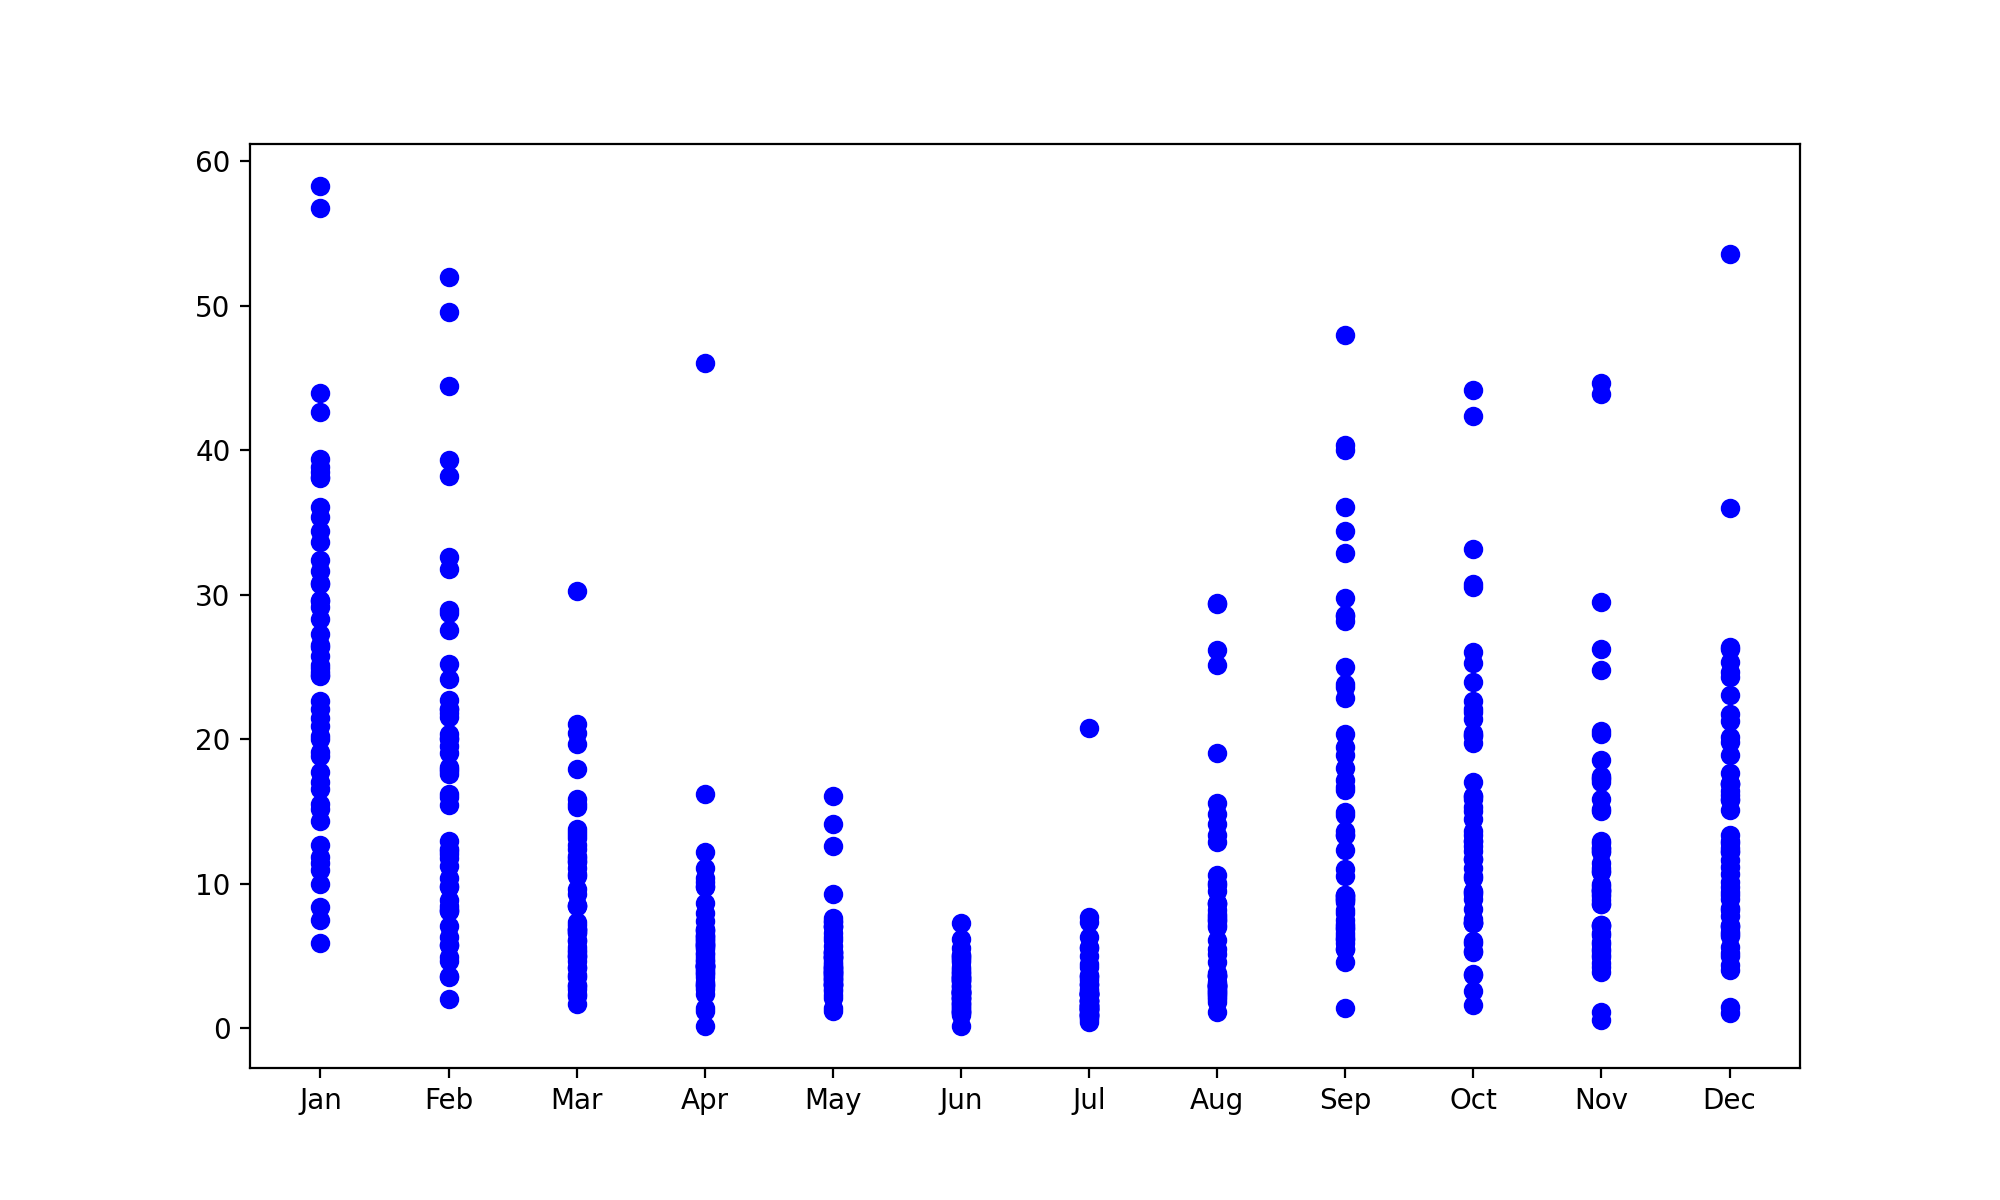

TypeError: cannot unpack non-iterable PathCollection object

In [104]:
month=compare_df['Month']
case_count=compare_df['Monthly_cases']
death_count=compare_df['Mortality_rate']
#monthly_cases, = plt.scatter(month, case_count, color="red", label="Monthly cases")
mortality_rate, = plt.scatter(month, death_count, color="blue", label="Mortality rate")
plt.title("Mortality rate in USA-2021")
plt.xlabel("Cases")
plt.ylabel("Mortality rate")

plt.legend(handles=[case_count, death_count], loc="best")

plt.grid()
plt.show()